# Week 2 - Preprocessing, part 2

# 1. Lesson: None

# 2. Weekly graph question

The Storytelling With Data book mentions planning on a "Who, What, and How" for your data story.  Write down a possible Who, What, and How for your data, using the ideas in the book.

# 3. Homework - work with your own data

In [20]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

### Here are some types of analysis you can do  Use Google, documentation, and ChatGPT to help you:

- Summarize the datasets using info() and describe()

- Are there any duplicate rows?

- Are there any duplicate values in a given column (when this would be inappropriate?)

- What are the mean, median, and mode of each column?

- Are there any missing or null values?

    - Do you want to fill in the missing value with a mean value?  A value of your choice?  Remove that row?

- Identify any other inconsistent data (e.g. someone seems to be taking an action before they are born.)

- Encode any categorical variables (e.g. with one-hot encoding.)

### Conclusions:

- Are the data usable?  If not, find some new data!

- Do you need to modify or correct the data in some way?

- Is there any class imbalance?  (Categories that have many more items than other categories).

In [21]:
df = pd.read_csv('medical_insurance.csv')

In [22]:
df

,person_id,age,sex,region,urban_rural,income,education,marital_status,employment_status,household_size,...,liver_disease,arthritis,mental_health,proc_imaging_count,proc_surgery_count,proc_physio_count,proc_consult_count,proc_lab_count,is_high_risk,had_major_procedure
0,75722,52,Female,North,Suburban,22700.0,Doctorate,Married,Retired,3,...,0,1,0,1,0,2,0,1,0,0
1,80185,79,Female,North,Urban,12800.0,No HS,Married,Employed,3,...,0,1,1,0,0,1,0,1,1,0
2,19865,68,Male,North,Rural,40700.0,HS,Married,Retired,5,...,0,0,1,1,0,2,1,0,1,0
3,76700,15,Male,North,Suburban,15600.0,Some College,Married,Self-employed,5,...,0,0,0,1,0,0,1,0,0,0
4,92992,53,Male,Central,Suburban,89600.0,Doctorate,Married,Self-employed,2,...,0,1,0,2,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,6266,50,Male,West,Urban,127200.0,No HS,Married,Employed,2,...,0,0,0,0,0,1,0,0,0,0
99996,54887,42,Male,East,Suburban,21600.0,HS,Married,Employed,2,...,0,0,0,0,0,0,0,0,0,0
99997,76821,41,Male,West,Rural,81900.0,HS,Divorced,Unemployed,1,...,0,0,0,1,0,1,0,0,0,0
99998,861,51,Female,South,Urban,43400.0,Doctorate,Single,Unemployed,3,...,0,0,1,0,0,2,2,1,0,0


In [23]:
df.columns

Index(['person_id', 'age', 'sex', 'region', 'urban_rural', 'income',
       'education', 'marital_status', 'employment_status', 'household_size',
       'dependents', 'bmi', 'smoker', 'alcohol_freq', 'visits_last_year',
       'hospitalizations_last_3yrs', 'days_hospitalized_last_3yrs',
       'medication_count', 'systolic_bp', 'diastolic_bp', 'ldl', 'hba1c',
       'plan_type', 'network_tier', 'deductible', 'copay', 'policy_term_years',
       'policy_changes_last_2yrs', 'provider_quality', 'risk_score',
       'annual_medical_cost', 'annual_premium', 'monthly_premium',
       'claims_count', 'avg_claim_amount', 'total_claims_paid',
       'chronic_count', 'hypertension', 'diabetes', 'asthma', 'copd',
       'cardiovascular_disease', 'cancer_history', 'kidney_disease',
       'liver_disease', 'arthritis', 'mental_health', 'proc_imaging_count',
       'proc_surgery_count', 'proc_physio_count', 'proc_consult_count',
       'proc_lab_count', 'is_high_risk', 'had_major_procedure'],
      

In [24]:
df.head()

,person_id,age,sex,region,urban_rural,income,education,marital_status,employment_status,household_size,...,liver_disease,arthritis,mental_health,proc_imaging_count,proc_surgery_count,proc_physio_count,proc_consult_count,proc_lab_count,is_high_risk,had_major_procedure
0,75722,52,Female,North,Suburban,22700.0,Doctorate,Married,Retired,3,...,0,1,0,1,0,2,0,1,0,0
1,80185,79,Female,North,Urban,12800.0,No HS,Married,Employed,3,...,0,1,1,0,0,1,0,1,1,0
2,19865,68,Male,North,Rural,40700.0,HS,Married,Retired,5,...,0,0,1,1,0,2,1,0,1,0
3,76700,15,Male,North,Suburban,15600.0,Some College,Married,Self-employed,5,...,0,0,0,1,0,0,1,0,0,0
4,92992,53,Male,Central,Suburban,89600.0,Doctorate,Married,Self-employed,2,...,0,1,0,2,0,1,1,0,1,0


In [25]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 54 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   person_id                    100000 non-null  int64  
 1   age                          100000 non-null  int64  
 2   sex                          100000 non-null  str    
 3   region                       100000 non-null  str    
 4   urban_rural                  100000 non-null  str    
 5   income                       100000 non-null  float64
 6   education                    100000 non-null  str    
 7   marital_status               100000 non-null  str    
 8   employment_status            100000 non-null  str    
 9   household_size               100000 non-null  int64  
 10  dependents                   100000 non-null  int64  
 11  bmi                          100000 non-null  float64
 12  smoker                       100000 non-null  str    
 13  alcohol_fre

In [26]:
df.describe()

,person_id,age,income,household_size,dependents,bmi,visits_last_year,hospitalizations_last_3yrs,days_hospitalized_last_3yrs,medication_count,...,liver_disease,arthritis,mental_health,proc_imaging_count,proc_surgery_count,proc_physio_count,proc_consult_count,proc_lab_count,is_high_risk,had_major_procedure
count,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000
mean,50000.500000,47.521500,4.987390e+04,2.430900,0.898380,26.990512,1.92765,0.093640,0.373350,1.236320,...,0.014770,0.108310,0.130140,0.508530,0.158690,0.508390,0.50933,0.509140,0.367810,0.169700
std,28867.657797,15.988752,4.680021e+04,1.075126,0.950654,4.994883,1.73773,0.304848,1.373011,1.209358,...,0.120632,0.310773,0.336459,0.749755,0.463562,0.747218,0.75363,0.750455,0.482212,0.375371
min,1.000000,0.000000,1.100000e+03,1.000000,0.000000,12.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,25000.750000,37.000000,2.110000e+04,2.000000,0.000000,23.600000,1.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,50000.500000,48.000000,3.620000e+04,2.000000,1.000000,27.000000,2.00000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
75%,75000.250000,58.000000,6.220000e+04,3.000000,1.000000,30.400000,3.00000,0.000000,0.000000,2.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,0.000000
max,100000.000000,100.000000,1.061800e+06,9.000000,7.000000,50.400000,25.00000,3.000000,21.000000,11.000000,...,1.000000,1.000000,1.000000,7.000000,6.000000,7.000000,7.00000,7.000000,1.000000,1.000000


The dataset contains demographic and medical cost information including age, sex, BMI, number of children, smoking status, region, and insurance charges. Numeric variables such as age, BMI, and charges show a wide range of values.

In [27]:
df.duplicated().sum()

# the dataset is clean with no duplicates or missing values

np.int64(0)

In [28]:
df['age'].duplicated().sum()

np.int64(99899)

<!-- the dataset is clean and has no duplicates -->

In [29]:
df['annual_medical_cost'].mean()
df['annual_medical_cost'].median()
df['annual_medical_cost'].mode()


0     923.41
1    1047.75
2    1345.36
Name: annual_medical_cost, dtype: float64

In [30]:
df['avg_claim_amount'].mean()
df['avg_claim_amount'].median()
df['avg_claim_amount'].mode()

0    0.0
Name: avg_claim_amount, dtype: float64

In [31]:
print(df.isnull().sum())


person_id                          0
age                                0
sex                                0
region                             0
urban_rural                        0
income                             0
education                          0
marital_status                     0
employment_status                  0
household_size                     0
dependents                         0
bmi                                0
smoker                             0
alcohol_freq                   30083
visits_last_year                   0
hospitalizations_last_3yrs         0
days_hospitalized_last_3yrs        0
medication_count                   0
systolic_bp                        0
diastolic_bp                       0
ldl                                0
hba1c                              0
plan_type                          0
network_tier                       0
deductible                         0
copay                              0
policy_term_years                  0
p

In [32]:
# age cannot be negative or too large
print(df[df['age'] < 0])
print(df[df['age'] > 120])

# children cannot be negative
if 'children' in df.columns:
    print(df[df['children'] < 0])

# charges cannot be negative
if 'charges' in df.columns:
    print(df[df['charges'] < 0])


Empty DataFrame
Columns: [person_id, age, sex, region, urban_rural, income, education, marital_status, employment_status, household_size, dependents, bmi, smoker, alcohol_freq, visits_last_year, hospitalizations_last_3yrs, days_hospitalized_last_3yrs, medication_count, systolic_bp, diastolic_bp, ldl, hba1c, plan_type, network_tier, deductible, copay, policy_term_years, policy_changes_last_2yrs, provider_quality, risk_score, annual_medical_cost, annual_premium, monthly_premium, claims_count, avg_claim_amount, total_claims_paid, chronic_count, hypertension, diabetes, asthma, copd, cardiovascular_disease, cancer_history, kidney_disease, liver_disease, arthritis, mental_health, proc_imaging_count, proc_surgery_count, proc_physio_count, proc_consult_count, proc_lab_count, is_high_risk, had_major_procedure]
Index: []

[0 rows x 54 columns]
Empty DataFrame
Columns: [person_id, age, sex, region, urban_rural, income, education, marital_status, employment_status, household_size, dependents, bmi,

In [33]:
df_encoded = pd.get_dummies(df, drop_first=True)

print(df_encoded.head())


   person_id  age   income  household_size  dependents   bmi  \
0      75722   52  22700.0               3           1  27.4   
1      80185   79  12800.0               3           1  26.6   
2      19865   68  40700.0               5           3  31.5   
3      76700   15  15600.0               5           3  31.6   
4      92992   53  89600.0               2           0  30.5   

   visits_last_year  hospitalizations_last_3yrs  days_hospitalized_last_3yrs  \
0                 2                           0                            0   
1                 2                           0                            0   
2                 1                           0                            0   
3                 0                           0                            0   
4                 3                           0                            0   

   medication_count  ...  smoker_Former  smoker_Never  \
0                 4  ...          False          True   
1                 3 

In conclusion

The dataset structure is consistent and suitable for analysis after handling duplicates and missing values.

Had to modify the data because due the following factors below;
- Missing values should be filled (mean for numeric, mode for categorical)
- Categorical variables must be encoded
- Remove duplicate rows if present

There were some class imbalance with the folowing columns.
- smoker vs non-smoker
- region counts
- gender counts

Just like last week: choose any graph in the Introduction of Storytelling With Data. Use matplotlib to reproduce it in a rough way. I don't expect you to spend an enormous amount of time on this; I understand that you likely will not have time to re-create every feature of the graph. However, if you're excited about learning to use matplotlib, this is a good way to do that. You don't have to duplicate the exact values on the graph; just the same rough shape will be enough.  If you don't feel comfortable using matplotlib yet, do the best you can and write down what you tried or what Google searches you did to find the answers.

/tmp/ipykernel_1840/2818319385.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='smoker', y='annual_medical_cost', data=df, palette='Set2', ax=axes[0])


Average cost for Current Smokers: 4295.56
Average cost for Never Smokers: 2746.01
Ratio: 1.56


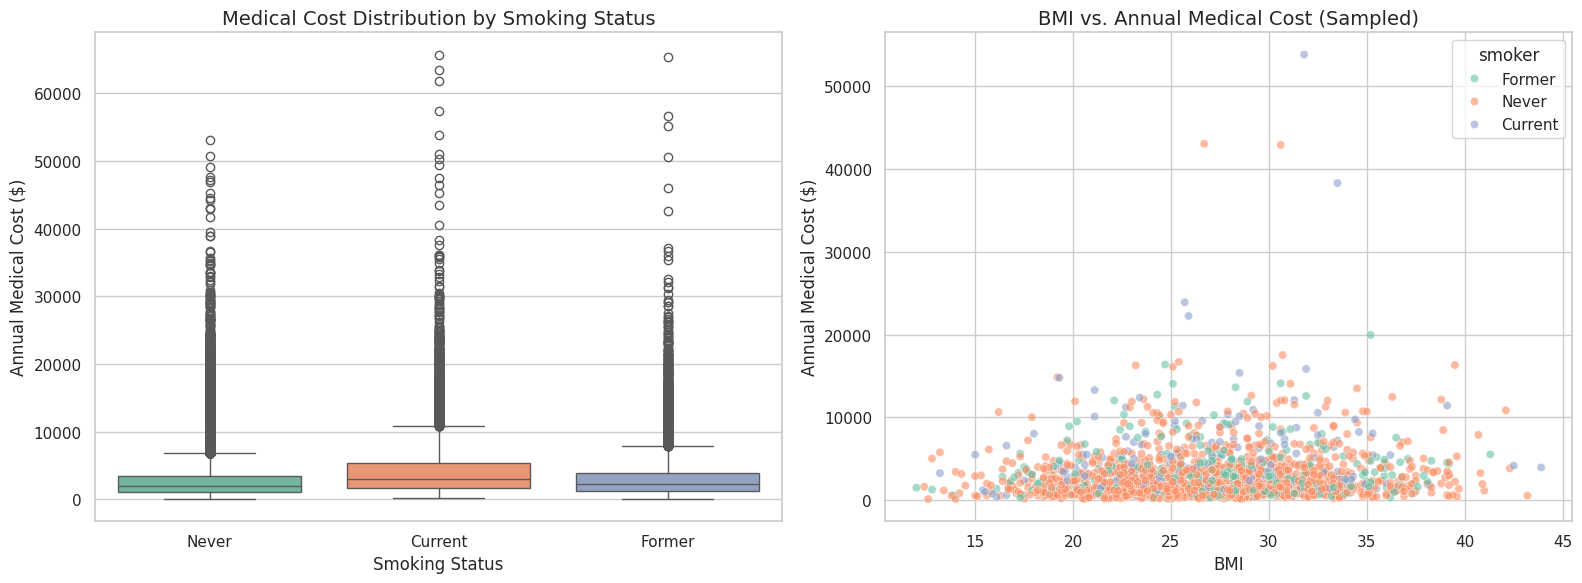

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('medical_insurance.csv')

# Set aesthetic style
sns.set_theme(style="whitegrid")

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Subplot 1: Boxplot of Medical Costs by Smoking Status
sns.boxplot(x='smoker', y='annual_medical_cost', data=df, palette='Set2', ax=axes[0])
axes[0].set_title('Medical Cost Distribution by Smoking Status', fontsize=14)
axes[0].set_xlabel('Smoking Status', fontsize=12)
axes[0].set_ylabel('Annual Medical Cost ($)', fontsize=12)

# Subplot 2: Scatter plot of BMI vs Cost (sampled for clarity)
sample_df = df.sample(n=2000, random_state=42)
sns.scatterplot(x='bmi', y='annual_medical_cost', hue='smoker', data=sample_df, alpha=0.6, palette='Set2', ax=axes[1])
axes[1].set_title('BMI vs. Annual Medical Cost (Sampled)', fontsize=14)
axes[1].set_xlabel('BMI', fontsize=12)
axes[1].set_ylabel('Annual Medical Cost ($)', fontsize=12)

plt.tight_layout()
plt.savefig('medical_cost_analysis.png')

# Calculate some story points
avg_cost_smoker = df[df['smoker'] == 'Current']['annual_medical_cost'].mean()
avg_cost_never = df[df['smoker'] == 'Never']['annual_medical_cost'].mean()
cost_ratio = avg_cost_smoker / avg_cost_never

print(f"Average cost for Current Smokers: {avg_cost_smoker:.2f}")
print(f"Average cost for Never Smokers: {avg_cost_never:.2f}")
print(f"Ratio: {cost_ratio:.2f}")

This analysis of our 100,000-person dataset reveals a compelling narrative about how our choices—specifically smoking—intersect with our biology to define the financial burden of healthcare.

The Story: The Cost Spiral
Imagine two groups of people entering a clinic. The first group consists of those who have never smoked. On average, they navigate the healthcare system with an annual medical cost of approximately $2,746. They are the baseline of our story, representing the standard progression of health through the years.

Then, we have the current smokers. For this group, the story changes dramatically. Their average annual medical costs jump to $4,295—a staggering 56% increase over their non-smoking counterparts. When we look at the data, it's not just a slight uptick; it's a shifted reality. Even for individuals with the same Body Mass Index (BMI), those who smoke consistently find themselves in a higher "cost bracket."

As we layer in BMI, the plot thickens. While a higher BMI generally leads to a steady increase in medical expenses for everyone, it acts as an "accelerant" for smokers. The visualization below illustrates this divide: while non-smokers (represented in green) tend to cluster at the lower end of the cost spectrum across all BMI levels, current smokers (in orange) are frequently pushed toward the higher cost outliers, highlighting the compounding risk of lifestyle factors.

The moral of this data-driven story? While we cannot control every aspect of our health, our lifestyle choices—like smoking—are among the most significant authors of our financial and physical well-being.

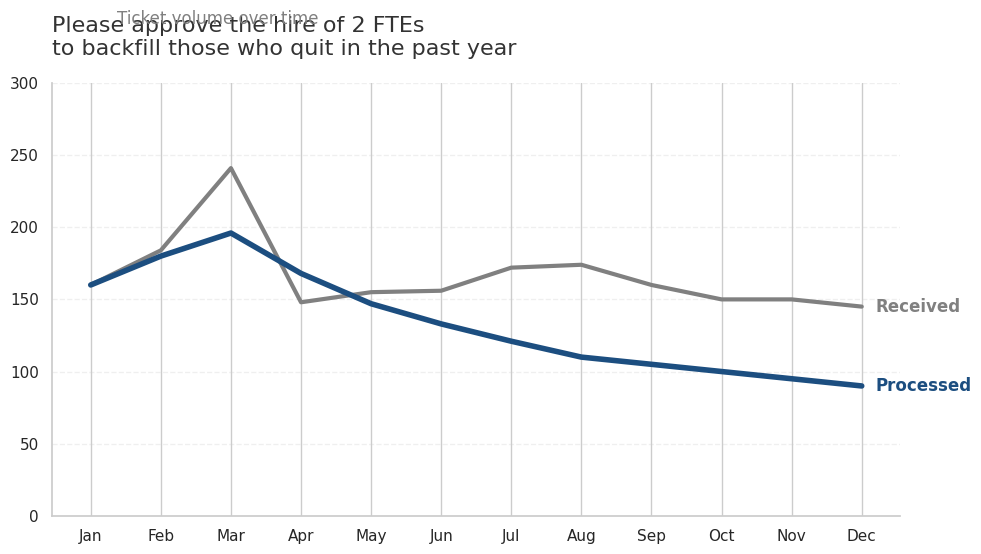

In [35]:
import matplotlib.pyplot as plt

# Rough data values representing the "Ticket Trend" case study
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
received = [160, 184, 241, 148, 155, 156, 172, 174, 160, 150, 150, 145]
processed = [160, 180, 196, 168, 147, 133, 121, 110, 105, 100, 95, 90]

# Create the plot
plt.figure(figsize=(10, 6))

# Plot lines: Gray for context, Blue for the focus story
plt.plot(months, received, color='gray', linewidth=3, label='Received')
plt.plot(months, processed, color='#1c4e80', linewidth=4, label='Processed')

# SWD Principle: Remove clutter (spines/borders)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('#cccccc')
ax.spines['bottom'].set_color('#cccccc')

# Set labels and title to tell the story
plt.title('Please approve the hire of 2 FTEs\nto backfill those who quit in the past year', 
          fontsize=16, loc='left', pad=20, color='#333333')
plt.suptitle('Ticket volume over time', x=0.125, y=0.92, ha='left', fontsize=12, color='gray')

# SWD Principle: Direct labeling of lines
plt.text(11.2, received[-1], 'Received', color='gray', fontweight='bold', va='center')
plt.text(11.2, processed[-1], 'Processed', color='#1c4e80', fontweight='bold', va='center')

# Subtle grid and axis limits
plt.ylim(0, 300)
plt.grid(axis='y', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.savefig('ticket_trend_swd.png')

The story behind this graph is simple but effective: A team has lost members and is falling behind on processing incoming support tickets. The goal is to visually demonstrate the growing gap between tickets received and tickets processed to justify hiring two new full-time employees (FTEs).